### 1.4: Some statistics with pandas

In [2]:
# import moduled
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/Stav/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


#### 1. Load in the SF crimes dataset:

In [3]:
crime = pd.read_csv('../../assets/datasets/sf_crime.csv')

#### 2. Print the head

In [4]:
crime.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2003-03-23 23:27:00,ARSON,ARSON OF A VEHICLE,Sunday,BAYVIEW,NONE,0 Block of HUNTERS PT EXPWY EX,-122.376945,37.733018
1,2006-03-07 06:45:00,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Tuesday,NORTHERN,NONE,0 Block of MARINA BL,-122.432952,37.805052
2,2004-03-06 03:00:00,NON-CRIMINAL,LOST PROPERTY,Saturday,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421
3,2011-12-03 12:10:00,BURGLARY,"BURGLARY OF STORE, UNLAWFUL ENTRY",Saturday,TARAVAL,"ARREST, BOOKED",3200 Block of 20TH AV,-122.475647,37.728528
4,2003-01-10 00:15:00,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Friday,NORTHERN,NONE,POLK ST / BROADWAY ST,-122.421772,37.795946


#### 3. Print the unique categories and how many there are

In [15]:
crime_count = crime['Category'].value_counts()
crime.groupby('Category').count()

,Dates,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
Category,,,,,,,,
ARSON,52,52,52,52,52,52,52,52
ASSAULT,2164,2164,2164,2164,2164,2164,2164,2164
BAD CHECKS,14,14,14,14,14,14,14,14
BRIBERY,8,8,8,8,8,8,8,8
BURGLARY,1023,1023,1023,1023,1023,1023,1023,1023
DISORDERLY CONDUCT,105,105,105,105,105,105,105,105
DRIVING UNDER THE INFLUENCE,75,75,75,75,75,75,75,75
DRUG/NARCOTIC,1533,1533,1533,1533,1533,1533,1533,1533
DRUNKENNESS,105,105,105,105,105,105,105,105


#### 4. Print the unique districts and how many there are

In [65]:
unique_districts = crime['PdDistrict'].value_counts().index.values

print " - ".join(unique_districts)
print len(unique_districts)



SOUTHERN - MISSION - NORTHERN - BAYVIEW - CENTRAL - TENDERLOIN - INGLESIDE - TARAVAL - PARK - RICHMOND
10


#### 5. Make a DataFrame of the crime categories and the number of crimes per category

In [78]:
pd.DataFrame(crime['Category'].value_counts())


,Category
LARCENY/THEFT,4934
OTHER OFFENSES,3656
NON-CRIMINAL,2601
ASSAULT,2164
DRUG/NARCOTIC,1533
VEHICLE THEFT,1506
VANDALISM,1280
WARRANTS,1239
BURGLARY,1023
SUSPICIOUS OCC,891


#### 6. Make a DataFrame of the districts and crime counts per district

In [43]:
pd.DataFrame(crime['PdDistrict'].value_counts())

,PdDistrict
SOUTHERN,4413
MISSION,3416
NORTHERN,3076
BAYVIEW,2555
CENTRAL,2424
TENDERLOIN,2336
INGLESIDE,2256
TARAVAL,1804
PARK,1438
RICHMOND,1282


#### 7. Make a DataFrame of the day of week and crime counts per day

In [83]:
# crime and categories per index
crime.groupby(['Category','PdDistrict']).count()

Dates  Descript  DayOfWeek  Resolution  Address  \
Category      PdDistrict                                                    
ARSON         BAYVIEW        11        11         11          11       11   
              CENTRAL         5         5          5           5        5   
              INGLESIDE       6         6          6           6        6   
              MISSION         7         7          7           7        7   
              NORTHERN        7         7          7           7        7   
              PARK            1         1          1           1        1   
              RICHMOND        2         2          2           2        2   
              SOUTHERN        8         8          8           8        8   
              TARAVAL         4         4          4           4        4   
              TENDERLOIN      1         1          1           1        1   
ASSAULT       BAYVIEW       244       244        244         244      244   
              CENTRAL       186       186        186         186      186   
              INGLESIDE     245       245        245         245      245   
              MISSION       342       342        342         342      342   
              NORTHERN      236       236        236         236      236   
              PARK          106       106        106         106      106   
              RICHMOND      102       102        102         102      102   
              SOUTHERN      343       343        343         343      343   
              TARAVAL       148       148        148         148      148   
              TENDERLOIN    212       212        212         212      212   
BAD CHECKS    BAYVIEW         4         4          4           4        4   
              CENTRAL         2         2          2           2        2   
              MISSION         2         2          2           2        2   
              NORTHERN        1         1          1           1        1   
              RICHMOND        2         2          2           2        2   
              SOUTHERN        1         1          1           1        1   
              TENDERLOIN      2         2          2           2        2   
BRIBERY       BAYVIEW         2         2          2           2        2   
              MISSION         1         1          1           1        1   
              RICHMOND        1         1          1           1        1   
...                         ...       ...        ...         ...      ...   
VEHICLE THEFT BAYVIEW       205       205        205         205      205   
              CENTRAL       118       118        118         118      118   
              INGLESIDE     261       261        261         261      261   
              MISSION       199       199        199         199      199   
              NORTHERN      174       174        174         174      174   
              PARK          112       112        112         112      112   
              RICHMOND      127       127        127         127      127   
              SOUTHERN      126       126        126         126      126   
              TARAVAL       160       160        160         160      160   
              TENDERLOIN     24        24         24          24       24   
WARRANTS      BAYVIEW       129       129        129         129      129   
              CENTRAL        91        91         91          91       91   
              INGLESIDE      70        70         70          70       70   
              MISSION       169       169        169         169      169   
              NORTHERN      141       141        141         141      141   
              PARK           61        61         61          61       61   
              RICHMOND       36        36         36          36       36   
              SOUTHERN      276       276        276         276      276   
              TARAVAL        42        42         42          42       42   
              TENDERLO

#### 8. Describe one of the datasets

In [84]:
crime.describe()

,X,Y
count,25000.000000,25000.000000
mean,-122.422454,37.773486
std,0.032753,0.572667
min,-122.513642,37.708003
25%,-122.432797,37.752874
50%,-122.416469,37.775421
75%,-122.406953,37.784401
max,-120.500000,90.000000


#### 9. Calculate the mean difference between the experimental and control below

In [86]:
control = [4.8,17.3,7.0,10.8,9.4,2.6,9.0,9.6,12.7,8.5,15.8,11.0,9.7,13.1,6.3,4.4,7.8,
           9.9,7.8,7.7,12.8,13.2,6.1,7.1,6.4,11.7,11.8,6.3,14.4,9.8,14.9,11.4,9.1,10.4,
           13.2,10.0,13.5,10.1,15.0,8.8,5.3,15.1,7.6,9.9,4.9,9.2,12.3,12.1,6.9,8.3,7.0,
           6.1,13.4,11.5,6.0,12.3,5.6,14.7,3.7,7.6,10.9,10.3,10.3,10.2,7.1,6.3,13.2,9.9,
           10.6,9.8,4.9,16.9,9.1,6.7,12.2,8.2,10.1,15.5,11.9,9.7,7.9,13.4,10.6,7.9,13.1,
           11.9,11.6,2.9,13.9,14.4,8.6,7.6,8.3,12.0,5.2,7.1,13.6,6.5,9.9,14.8]

In [87]:
experimental = [15.4,14.7,14.0,25.3,15.1,14.6,0.0,20.5,16.9,18.9,20.1,16.5,13.1,16.4,
                18.3,21.3,6.3,9.0,12.1,7.4,25.6,10.8,11.4,12.1,22.7,20.1,18.3,9.4,11.0,
                14.8,12.5,12.3,16.4,13.3,14.1,15.7,12.2,15.2,16.9,1.5,18.6,4.2,12.2,8.2,
                15.3,9.3,12.0,22.8,19.7,10.7,17.8,15.4,14.5,22.2,16.7,19.3,17.1,17.4,5.4,
                10.9,13.7,17.1,11.2,15.0,18.2,14.2,11.0,19.6,10.9,13.9,17.3,11.1,19.9,
                11.2,25.1,23.7,16.5,17.9,20.1,15.8,26.4,17.7,18.9,5.6,25.6,10.4,15.5,17.7,
                22.9,18.9,21.2,5.5,13.2,13.4,21.9,11.1,13.7,16.9,16.4,18.8 ]

#### 10. Calculate the t-statistic for the difference between means by hand (if you forgot it, look it up online or in the notes!)

The standard deviation component is the standard deviation across groups.

In [100]:
import scipy
control_mean = np.mean(control)
exper_mean = np.mean(experimental)
control_std = np.std(control)
exper_std = np.std(experimental)
print 'control mean:', control_mean
print 'experimental mean:', exper_mean
print 'control std:', control_std
print 'experimental std:', exper_std

t_test = (exper_mean - control_mean)/((control_std+exper_std)/2)/np.sqrt(len(control))
print t_test
scipy.stats.ttest_ind(control,experimental)

control mean: 9.857
experimental mean: 15.27
control std: 3.24617482585
experimental std: 5.20702410211
0.128069859615


Ttest_indResult(statistic=-8.7774588631017529, pvalue=7.8171758298582911e-16)

#### 11. Plot the control and experimental distributions using seaborn on the same plot (with different colors for each)

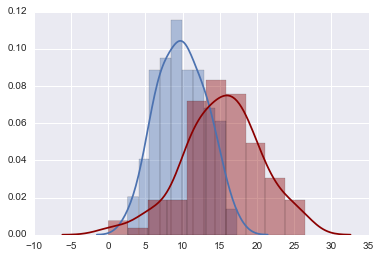

In [92]:
ax = sns.distplot(control, bins=10)
sns.distplot(experimental, color='darkred', bins=10, ax=ax)


#### 11. [BONUS] Write a function to bootstrap the 99% confidence interval for the t-statistic.

Look up: np.percentile!